In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as mstats

In [125]:
train=pd.read_csv('./final_data_train.csv',index_col=0).reset_index(drop=True)
train



,기업명,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG,E,S,G,배당기업구분
0,CS홀딩스,서비스업,2011,1.887535e+11,15.95,86.25,30.53,0.070627,0.390,C,B,C,C,무배당기업
1,KISCO홀딩스,서비스업,2011,7.797319e+11,14.21,87.56,5.37,0.055293,0.325,C,B+,C,C,중배당기업
2,LG이노텍,전기전자,2011,4.409967e+12,232.87,30.04,10.95,0.063961,1.760,A,B+,A,A,무배당기업
3,MH에탄올,음식료품,2011,1.342069e+11,214.54,31.79,-18.64,0.003993,0.360,C,B,C,B이하,무배당기업
4,OCI,화학,2011,7.205013e+12,93.68,51.63,28.71,0.321332,3.025,A,A,A,A,중배당기업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,후성,화학,2021,6.163344e+11,117.43,45.99,45.74,0.218873,6.010,B+,A,B,B,저배당기업
3748,휠라홀딩스,유통업,2021,4.288857e+12,85.95,53.78,21.26,0.138261,6.610,A,B+,A+,A,고배당기업
3749,휴비스,화학,2021,8.434152e+11,80.28,55.47,0.00,-0.013347,0.900,A,B+,A+,A,저배당기업
3750,휴스틸,철강금속,2021,9.519209e+11,51.97,65.80,68.62,0.004646,0.185,C,C,C,B,중배당기업


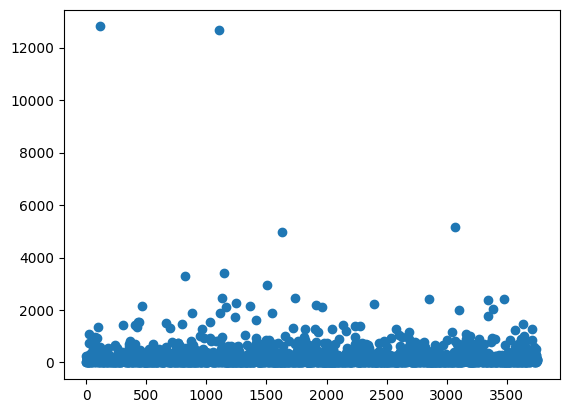

In [126]:
plt.scatter(train.index,train['부채비율'])



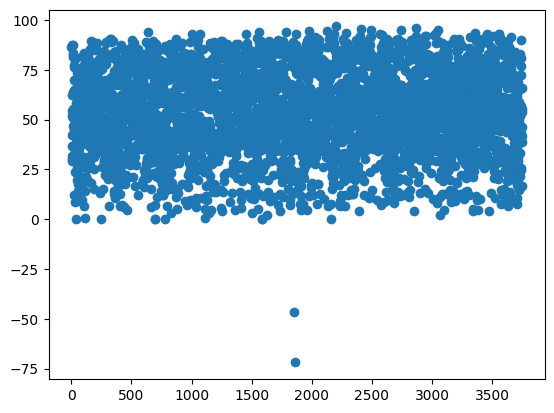

In [127]:
plt.scatter(train.index,train['자기자본비율'])

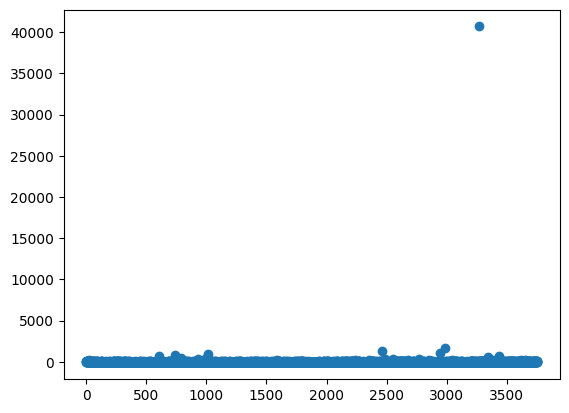

In [128]:
plt.scatter(train.index,train['매출액증가율'])

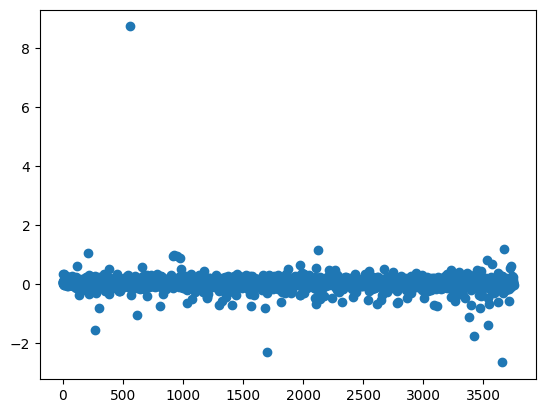

In [129]:
plt.scatter(train.index,train['현금흐름'])

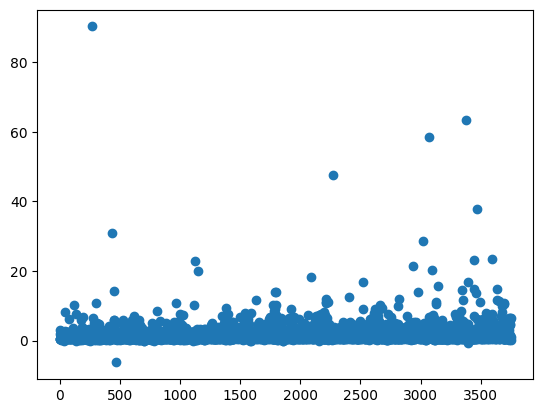

In [130]:
plt.scatter(train.index,train['PBR'])

In [131]:
pd.get_dummies(train,columns=['ESG','E','S','G'])

,기업명,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,배당기업구분,...,S_C,S_D,G_-,G_A,G_A+,G_B,G_B+,G_B이하,G_C,G_D
0,CS홀딩스,서비스업,2011,1.887535e+11,15.95,86.25,30.53,0.070627,0.390,무배당기업,...,True,False,False,False,False,False,False,False,True,False
1,KISCO홀딩스,서비스업,2011,7.797319e+11,14.21,87.56,5.37,0.055293,0.325,중배당기업,...,True,False,False,False,False,False,False,False,True,False
2,LG이노텍,전기전자,2011,4.409967e+12,232.87,30.04,10.95,0.063961,1.760,무배당기업,...,False,False,False,True,False,False,False,False,False,False
3,MH에탄올,음식료품,2011,1.342069e+11,214.54,31.79,-18.64,0.003993,0.360,무배당기업,...,True,False,False,False,False,False,False,True,False,False
4,OCI,화학,2011,7.205013e+12,93.68,51.63,28.71,0.321332,3.025,중배당기업,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,후성,화학,2021,6.163344e+11,117.43,45.99,45.74,0.218873,6.010,저배당기업,...,False,False,False,False,False,True,False,False,False,False
3748,휠라홀딩스,유통업,2021,4.288857e+12,85.95,53.78,21.26,0.138261,6.610,고배당기업,...,False,False,False,True,False,False,False,False,False,False
3749,휴비스,화학,2021,8.434152e+11,80.28,55.47,0.00,-0.013347,0.900,저배당기업,...,False,False,False,True,False,False,False,False,False,False
3750,휴스틸,철강금속,2021,9.519209e+11,51.97,65.80,68.62,0.004646,0.185,중배당기업,...,True,False,False,False,False,True,False,False,False,False


################################################################################################################################################

In [133]:
A=pd.read_csv('./winsor_1.csv',encoding='euc-kr',index_col='기업명').drop('Unnamed: 0',axis=1)
A['총자산규모']=np.log(A['총자산규모'])
x=A.iloc[:,2:40]
y=A['배당기업구분']


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=0,stratify=y)
dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train,y_train)
pred= dt_clf.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(f'결정 트리 예측 정확도:{accuracy:.4f}')

결정 트리 예측 정확도:0.5288


In [137]:
B=pd.read_csv('./winsor_1.csv',encoding='euc-kr',index_col='기업명').drop('Unnamed: 0',axis=1)
B['총자산규모']=np.log(B['총자산규모'])
x=B.iloc[:,2:7]
y=B['배당기업구분']


In [138]:
# B=pd.read_csv('./winsor_1.csv',encoding='euc-kr',index_col='기업명').drop('Unnamed: 0',axis=1)
# x=B.iloc[:,2:7]
# y=B['배당기업구분']
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=0,stratify=y)
dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train,y_train)
pred= dt_clf.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(f'결정 트리 예측 정확도:{accuracy:.4f}')

결정 트리 예측 정확도:0.4595
